# advertising problem from scratch


 Paramètres entraînés :
  bias = 13.963
  w1 = 3.9716
  w2 = 2.7897
  w3 = -0.0186

 MSE sur test set : 1.916

 Équation de la régression :
y = 13.963 + (3.972)*TV + (2.790)*Radio + (-0.019)*Newspaper


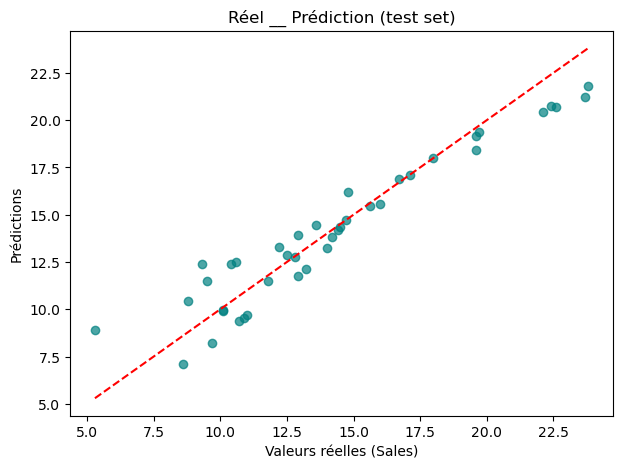

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("Advertising.csv", index_col=0)
X = df.iloc[:, :-1].values  # Features: TV, Radio, Newspaper
y = df.iloc[:, -1].values   # Target: Sales

# Split manuel des données (80% train, 20% test)
def split_data(X, y, test_size=0.2):
    n = len(X)
    indices = np.arange(n)
    np.random.shuffle(indices)
    test_count = int(n * test_size)
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = split_data(X, y)

# Normalisation des features
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train, mean, std = normalize(X_train)
X_test = (X_test - mean) / std

# Descente de gradient
def fit(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    W = np.zeros(n_features)
    bias = 0
    mse_list = []

    for epoch in range(epochs):
        y_pred = bias + np.dot(X, W)
        error = y - y_pred
        mse = np.mean(error ** 2)
        mse_list.append(mse)

        # Gradients
        grad_bias = -(2/n_samples) * np.sum(error)
        grad_W = -(2/n_samples) * np.dot(X.T, error)

        # Mise à jour
        bias -= learning_rate * grad_bias
        W -= learning_rate * grad_W

    return bias, W, mse_list

# Entraînement du modèle
bias, W, mse_list = fit(X_train, y_train)

# Prédictions
y_pred_test = bias + np.dot(X_test, W)

# Évaluation
mse_test = np.mean((y_test - y_pred_test) ** 2)
print("\n Paramètres entraînés :")
print(f"  bias = {bias:.3f}")
for i, w in enumerate(W):
    print(f"  w{i+1} = {w:.4f}")
print(f"\n MSE sur test set : {mse_test:.3f}")

# Équation du modèle
features = ['TV', 'Radio', 'Newspaper']
equation = f"y = {bias:.3f}"
for i in range(len(W)):
    equation += f" + ({W[i]:.3f})*{features[i]}"
print("\n Équation de la régression :")
print(equation)

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='teal')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Réel __ Prédiction (test set)")
plt.xlabel("Valeurs réelles (Sales)")
plt.ylabel("Prédictions")
plt.show()